In [55]:
import nltk
import os,math,glob,re,copy,random

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize,RegexpTokenizer,TweetTokenizer
from nltk.stem.porter import PorterStemmer
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer

import re as regex
import numpy as np
from sklearn.externals import joblib
import contractions
from operator import itemgetter
from itertools import chain

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score,contingency_matrix
import matplotlib.pyplot as plt

In [2]:
# from my previous assignment
def contract(text):
    return contractions.fix(text)

def regTokenize(text):
#     tok=RegexpTokenizer('[A-Za-z0-9]*[.]?\w+')
    tok=RegexpTokenizer('[A-Za-z0-9]?\w+')
    return tok.tokenize(text) 

def lowercase(text):
    return text.lower()

def lemma(words):
    for i in range(0,len(words)):
        words[i]=WordNetLemmatizer().lemmatize(words[i])
    return words

def stemming(words):
    porter_stemmer=PorterStemmer()
    for i in range(0,len(words)):
        words[i]=porter_stemmer.stem(words[i])
    return words

def tweet(words):
    tok=TweetTokenizer()
    return tok.tokenize(words)

def comma(text):
    text = "".join(c for c in text if c not in ('!','.',':',',','"','?','(',')'))
    return text

def removestopwords(text):
    stopWords = set(stopwords.words('english'))
    wordsFiltered = []
    for w in text:
        if w not in stopWords:
            wordsFiltered.append(w)
    return wordsFiltered

In [3]:
#some functions are from 2nd Assignment
def getDocLength(docId):#getting len(document)=number of words in that document from metadata
    return metadata.get(docId)

def getWordFreqInBodyDoc(docId,word):#getting word frequency in doc in document
    f=open(docId,'r+',errors='ignore')
    data=f.read()
    data=lowercase(data)
    data=contract(data)
    data=comma(data)
    data=regTokenize(data)
    data=lemma(data)
#     data=stemming(data)
    freq=data.count(word)
    return freq

def getQTermPosts(term):#getting postings of term from dictionary
    return terms_dictionary_load.get(term)[1]

def getTermDocFreq(t):
    return terms_dictionary_load.get(t)[0]

def getDocWords(docId):
    f=open(docId,'r+',errors='ignore')
    data=f.read()
    data=lowercase(data)
    data=contract(data)
    data=comma(data)
    data=regTokenize(data)
    data=lemma(data)
#     data=stemming(data)
    return data

In [4]:
classes={'comp.graphics':0,'rec.sport.hockey':1,'sci.med':2,'sci.space':3,'talk.politics.misc':4}

#### Structures
#### terms=[words]
#### terms_dictionary={term :[#df,[filname1,filename2,...]]}   --> Inverted Index
#### metadata= [ [filename, #words],[..],.. ]

#### document_id=[filename1,..]

#### vsm=[ [tf-idf,..], [..], .. ] --> tf-idf vector for each document

#### vsm_dictionary={filename:[vector], ...}

In [5]:
# document_ids=[]
# # metadata=[]
# metadata={}
# terms=[]
# terms_dictionary={}

# path = 'q1_q2_dataset'
# print(path)
# for dire in glob.glob(os.path.join(path, '*')):
#     print(dire)
#     for filename in glob.glob(os.path.join(dire, '*')):
#         st=filename.split('\\')
#         s=path+'/'+st[1]+'/'+st[2]
# #         print(s)
#         docId=s
#         document_ids.append(docId)

#         f=open(filename,'r+')
#         data=f.read()

#         data=lowercase(data)
#         data=contract(data)
#         data=regTokenize(data)
#         data=lemma(data)
# #         data=stemming(data)

#         data=list(set(data))
        
#         temp=[]
#         temp.append(s)
#         temp.append(len(data))
# #         metadata.append(temp)
#         metadata[s]=len(data)
        
#         for t in data:
#             terms.append(t)
#             if(t not in terms_dictionary.keys()):
#                 terms_dictionary[t]=[]
#                 docfreq=1
#                 terms_dictionary[t].append(docfreq)
#                 docs=[docId]
#                 terms_dictionary[t].append(docs)
#             else:
#                 terms_dictionary.get(t)[1].append(docId)
#                 terms_dictionary.get(t)[0]=len(terms_dictionary.get(t)[1])
#     print('============================================================')

In [6]:
# len(set(terms))

In [7]:
# terms[0]

In [8]:
# document_ids

In [9]:
# terms=list(set(terms))

In [10]:
# terms

In [11]:
# terms_dictionary['will'][1]

In [12]:
# for i in metadata:
#     print(i,' ',metadata.get(i))
#     break
# for i in terms:
#     print(i)
#     break
# print(len(terms))

# # print(terms_dictionary.get('bike'))
# # print(len(metadata))

In [13]:
# metadata

### idf=1

In [14]:
# vsm=[]
# vsm_dictionary={}

# n=len(document_ids)
# count=0
# for i in document_ids:
# #     print(i)
#     d_tf_idf=[]

#     doc_words=getDocWords(i)
#     doc_length=getDocLength(i)
#     for w in terms:
# #         print(w)
#         freq=doc_words.count(w)
#         tf=freq/doc_length

#         inner=n/terms_dictionary.get(w)[0]
#         idf=math.log(inner)
        
#         idf=1
#         tf_idf=tf*idf
        
#         d_tf_idf.append(tf_idf)
#     vsm.append(d_tf_idf)
#     vsm_dictionary[i]=d_tf_idf
    
#     count+=1
#     print(count)

## dumping

In [15]:
# documentIds_fname='sav/1/document_ids_bow.sav'
# joblib.dump(document_ids,documentIds_fname)

# metadata_fname='sav/1/metadata_bow.sav'
# joblib.dump(metadata,metadata_fname)

# terms_fname='sav/1/terms_bow.sav'
# joblib.dump(terms,terms_fname)

# terms_dictionary_fname='sav/1/terms_dictionary_bow.sav'
# joblib.dump(terms_dictionary,terms_dictionary_fname)

# vsm_fname='sav/1/vsm_bow.sav'
# joblib.dump(vsm,vsm_fname)

# vsm_dictionary_fname='sav/1/vsm_dictionary_bow.sav'
# joblib.dump(vsm_dictionary,vsm_dictionary_fname)

In [16]:
# print(len(vsm),len(vsm[0]),len(vsm_dictionary))

### Loading sav files

In [17]:
documentIds_fname='sav/1/document_ids_bow.sav'
document_ids= joblib.load(documentIds_fname)

metadata_fname='sav/1/metadata_bow.sav'
metadata=joblib.load(metadata_fname)

terms_fname='sav/1/terms_bow.sav'
terms=joblib.load(terms_fname)

terms_dictionary_fname='sav/1/terms_dictionary_bow.sav'
terms_dictionary=joblib.load(terms_dictionary_fname)

In [18]:
vsm_fname='sav/1/vsm_bow.sav'
vsm=joblib.load(vsm_fname)

In [20]:
vsm_dictionary_fname='sav/1/vsm_dictionary_bow.sav'
vsm_dictionary=joblib.load(vsm_dictionary_fname)

print(len(document_ids),len(metadata),len(terms),len(terms_dictionary))

5000 5000 65309 65309


In [24]:
X_class_filename='sav/2/X_class.sav'
X_class = joblib.load(X_class_filename)

y_class_filename='sav/2/y_class'
y_class = joblib.load(y_class_filename)

## K-means

In [21]:
def ecul_dist(x,y):
    sub=np.subtract(x,y)
    square = sub**2
    summ = np.sum(square)
    sqrt = math.sqrt(summ)
    return sqrt

def mean(args):
    meann=[]
    for cluster in args:
        if(len(cluster)==0):
            meann.append(0)
            continue
        meann.append(np.mean(cluster,axis=0))
    return meann  

In [22]:
# dist=[]
# clusters=[[],[],[],[],[]]

# no_of_clusters=5
# seed=random.sample(vsm,no_of_clusters)

# maxItr=15
# count=0
# for i in range(maxItr):
#     print('Iteration:',i)
#     for j in vsm:
#         for k in seed:
#             dist.append(ecul_dist(k,j))
#         min_dist=np.argmin(dist)
#         dist=[]
#         clusters[min_dist].append(j)
        
#     seed1= seed
#     seed= mean(clusters) 

#     if (np.array_equal(seed,seed1)):
#         print('Updated Centroid')
#         print("convergence reached!!")
#         break

#     for p in clusters:
#         if(len(p)==0 and i==0):
#             print("Invalid Seed Initialization!!")
#             print("Changing the seed by randomly picking from data set")
#             maxItr=maxItr+1
#             count=0
#             seed=random.sample(vsm,no_of_clusters)
#             break
            
#     for l in range(no_of_clusters):
#         print(len(clusters[l]),' ', end='')
#     if(i != (maxItr-1)):
#         clusters=[]
#         for l in range(no_of_clusters):
#             clusters.append([])
#     count=count+1
    
#     print()

In [56]:
def k_means(dataset_w2v , no_of_clusters, maxItr):
    dist=[]
    clusters=[[],[],[],[],[]]

    seed=random.sample(dataset_w2v , no_of_clusters)

    purity_plot=[]
    ari_plot=[]
    nmi_plot=[]
    rss_plot=[]
    
    count=0
    predicted_cluster=[]
    for i in range(maxItr):
        print('-------------------------------------------------')
        rss=0
        print('Iteration:',i)
        for j in dataset_w2v:
            for k in seed:
                dist.append(ecul_dist(k,j))
            min_dist=np.argmin(dist)
            
            rss+=dist[min_dist]
            
            dist=[]
            clusters[min_dist].append(j)
            
            predicted_cluster.append(min_dist) ##

        seed1= seed
        seed= mean(clusters)

        if (np.array_equal(seed,seed1)):
            print('Updated Centroid')
            print("convergence reached!!")
            break

        for p in clusters:
            if(len(p)==0 and i==0):
                print("Invalid Seed Initialization!!")
                print("Changing the seed by randomly picking from data set")
                maxItr=maxItr+1
                count=0
                seed=random.sample(dataset_w2v,no_of_clusters)
                break

        for l in range(no_of_clusters):
            print(len(clusters[l]),' ', end='')
            
        
        
        cont_matrix= contingency_matrix(y_class, predicted_cluster)
        
#         print(cont_matrix)
        
        columnwise_max=np.amax(cont_matrix,axis=0)
        max_sum=np.sum(columnwise_max)
        purity=max_sum/ np.sum(cont_matrix)
        
        ari=adjusted_rand_score(predicted_cluster, y_class)
        nmi=normalized_mutual_info_score(y_class, predicted_cluster)
        
        purity_plot.append(purity)
        ari_plot.append(ari)
        rss_plot.append(rss)
        nmi_plot.append(nmi)
        
        print('\n\nPurity:', purity, '\t\t\t|\tARI:', ari , '\nRSS:', rss, '\t|\tNMI:', nmi)        
        
        if(i != (maxItr-1)):
            clusters=[]
            predicted_cluster=[]
            for l in range(no_of_clusters):
                clusters.append([])
            
        count=count+1
        
    return purity_plot, ari_plot, rss_plot, nmi_plot, clusters

In [57]:
no_of_clusters=5
maxItr=20
purity_plot, ari_plot, rss_plot, nmi_plot, clusters = k_means(vsm, no_of_clusters, maxItr)

-------------------------------------------------
Iteration: 0
1342  399  1289  1950  20  

Purity: 0.2922 			|	ARI: 0.03168169538838948 
RSS: 701.022988686295 	|	NMI: 0.041717725066228936
-------------------------------------------------
Iteration: 1
1628  383  1044  1921  24  

Purity: 0.2892 			|	ARI: 0.025282713614710465 
RSS: 534.2168316604761 	|	NMI: 0.0391493119350891
-------------------------------------------------
Iteration: 2
1755  349  950  1904  42  

Purity: 0.2926 			|	ARI: 0.02627797901716412 
RSS: 530.9438783741565 	|	NMI: 0.04385453824395306
-------------------------------------------------
Iteration: 3
1727  322  1169  1756  26  

Purity: 0.2858 			|	ARI: 0.027285822081854646 
RSS: 526.7160571008837 	|	NMI: 0.040035492752037466
-------------------------------------------------
Iteration: 4
1730  292  1306  1654  18  

Purity: 0.283 			|	ARI: 0.026840829987402306 
RSS: 525.9158809005942 	|	NMI: 0.03723286972131384
-------------------------------------------------
Iter

In [58]:
# for l in range(no_of_clusters):
#         print(len(clusters[l]),' ', end='')

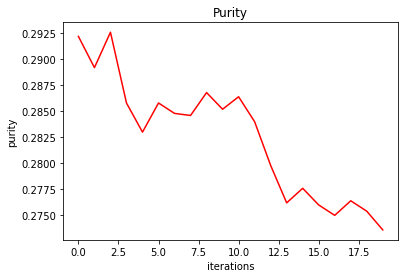

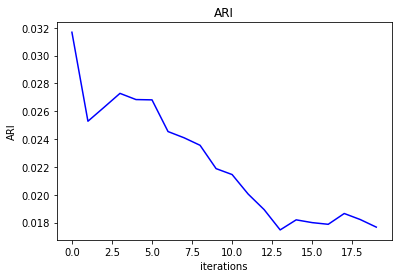

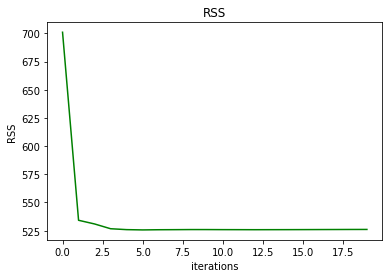

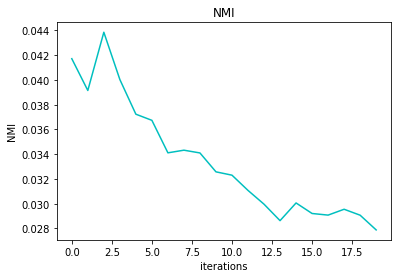

In [59]:
plt.title('Purity')
plt.plot(range(len(purity_plot)), purity_plot,color='r')
plt.xlabel('iterations')
plt.ylabel('purity')
plt.show()

plt.title('ARI')
plt.plot(range(len(ari_plot)), ari_plot,color='b')
plt.xlabel('iterations')
plt.ylabel('ARI')
plt.show()

plt.title('RSS')
plt.plot(range(len(rss_plot)), rss_plot,color='g')
plt.xlabel('iterations')
plt.ylabel('RSS')
plt.show()

plt.title('NMI')
plt.plot(range(len(nmi_plot)), nmi_plot,color='c')
plt.xlabel('iterations')
plt.ylabel('NMI')
plt.show()